### Purpose
Data taken from an activwatch is analyzed for trends across activity, time, and light intensity.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore') #Hides log(0) error with the light graphs

In [2]:
def timeshift(time):
    """Starts the day at noon for the waveform"""
    x = time.hour + time.minute/60 + time.second/3600
    x = x + 12
    if x >= 24:
        x = x-24
    return x

In [3]:
#Import
df = pd.read_csv("watch_data_full.csv", index_col = 'Unnamed: 0')
zeros = df.copy()

In [5]:
#Initial cleanup
df.drop("Interval.Status", axis = 1, inplace=True)
df["Timestamp"] = pd.to_datetime(df.Date + ' ' + df.Time)
df.drop("Date", axis = 1, inplace= True)
df["Date"] = df.Timestamp.transform(func = lambda x : x.day_of_year)
df["Hours"] = df.Timestamp.transform(func = lambda x : x.hour + x.minute/60 + x.second/3600)
df['Hours_shift'] = df.Timestamp.transform(func = lambda x : timeshift(x))
df['Dayofweek'] = df.Timestamp.transform(func = lambda x : x.day_of_week)
df['int_hour'] = df.Timestamp.transform(func = lambda x : x.hour)
problem_row = df.loc[df.Date == 99].loc[df.Hours == 0].index[0] #Some random datapoint that needs to get dropped
df.drop(problem_row, inplace = True)
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)


,Time,Off.Wrist.Status,Activity,Marker,White.Light,Red.Light,Green.Light,Blue.Light,Sleep.Wake,Timestamp,Date,Hours,Hours_shift,Dayofweek,int_hour
0,8:40:00 AM,0.2,63.125,0.125,489.74375,566.3375,1098.2375,441.725,0.428571,2021-04-09 08:40:00,99,8.666667,20.666667,4,8
1,8:50:00 AM,0.0,201.600,0.000,165.44700,211.2100,287.7800,151.020,0.900000,2021-04-09 08:50:00,99,8.833333,20.833333,4,8
2,9:00:00 AM,0.0,519.800,0.000,65.37800,96.9100,93.1500,57.140,1.000000,2021-04-09 09:00:00,99,9.000000,21.000000,4,9
3,9:10:00 AM,0.0,354.500,0.000,209.87500,336.3200,264.9300,176.750,1.000000,2021-04-09 09:10:00,99,9.166667,21.166667,4,9
4,9:20:00 AM,0.0,124.100,0.000,28.68400,30.3740,28.3000,17.307,1.000000,2021-04-09 09:20:00,99,9.333333,21.333333,4,9


In [6]:
#Minmax feature scaling of Activivty
mn = df.Activity.min()
mx = df.Activity.max()
df["act_norm"] = df.Activity.transform(func = lambda x: (x-mn)/(mx-mn))

In [7]:
#Filters by day of week
weekday = df.loc[df.Dayofweek <= 4]
weekend = df.loc[df.Dayofweek >= 5]

In [8]:
def meanitup(df, label):
    '''Groups all observations by the value in a column and outputs
    a dataframe of the means of all values as grouped. 
    df is data frame
    label is column label'''
    cols = list(df.columns)
    cols.remove(label)
    labels = list(df[label].unique())
    
    mean = pd.DataFrame(labels)
    
    for column in tqdm(cols, position = 0):
        lst = []
        for entry in tqdm(labels, position = 1, leave = None):
            sel_series = df[[label,column]].loc[df[label] == entry][column]

            if sel_series.dtype == 'float64':
                x = sel_series.mean()
                lst.append(x)
            else:
                pass
        if lst != []:
            mean[column] = lst
        else:
            pass
    mean.rename(columns = {0:label}, inplace = True)
    return(mean)

### Mean dataframes
Data was collected every 15 seconds. Data was first filtered by whenever it was collected in the weekday or weekend or not filtered at all. The mean of all datapoints from the same 15 seconds in each of these sets was taken, creating an "Average day" on the weekday, weekend, or all days.

In [9]:
#Creates mean dataframes, and organizes it from noon to noon
mean_weekend = meanitup(weekend, 'Hours_shift').sort_values(by = 'Hours_shift')
mean_weekday = meanitup(weekday, 'Hours_shift').sort_values(by = 'Hours_shift')
mean_all = meanitup(df, "Hours_shift").sort_values(by = 'Hours_shift')
mean_day = meanitup(df, 'Dayofweek').sort_values(by = 'Dayofweek')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
#Creates hourly buckets and averages all activity in the interger hour
mean_int = meanitup(df, "int_hour").sort_values(by = 'int_hour')
weekday_int = meanitup(weekday, "int_hour").sort_values(by = 'int_hour')
weekend_int = meanitup(weekend, "int_hour").sort_values(by = 'int_hour')
mean_int.reset_index(inplace = True, drop = True)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

### Figure 1
This figure shows the average activity over a day on a weekday and on the weekend. This graph clearly shows that activity startaround the same time and ends earlier on weekdays compared to weekends. 

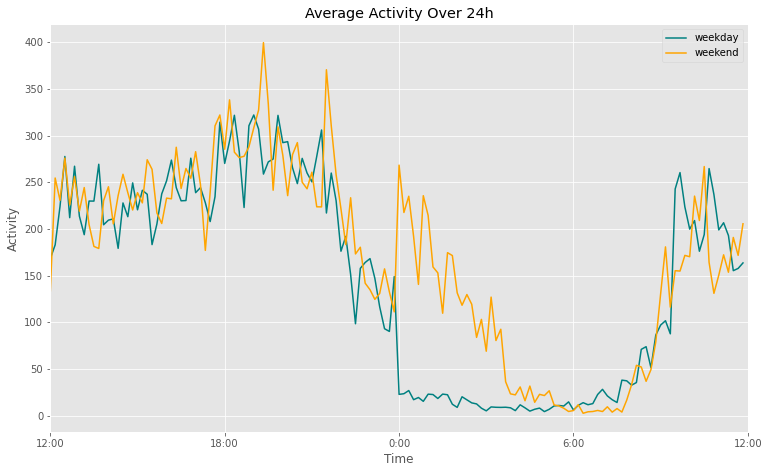

In [11]:
plt.figure(figsize=(12.5,7.5))
ax = plt.axes()
plt.plot(mean_weekday.Hours_shift, mean_weekday.Activity, c = 'teal')
plt.plot(mean_weekend.Hours_shift, mean_weekend.Activity, c='orange')
plt.xticks([0,6,12,18,24],["12:00","18:00","0:00", "6:00", "12:00"])
plt.xlim([0,24])
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Average Activity Over 24h')
plt.legend(["weekday", "weekend"])
plt.savefig('mean_act.png')

### Figure 2
This figure uses a polar chart to show average activity in each hour of the day. This visualization shows the same information, but bucketed by hour.

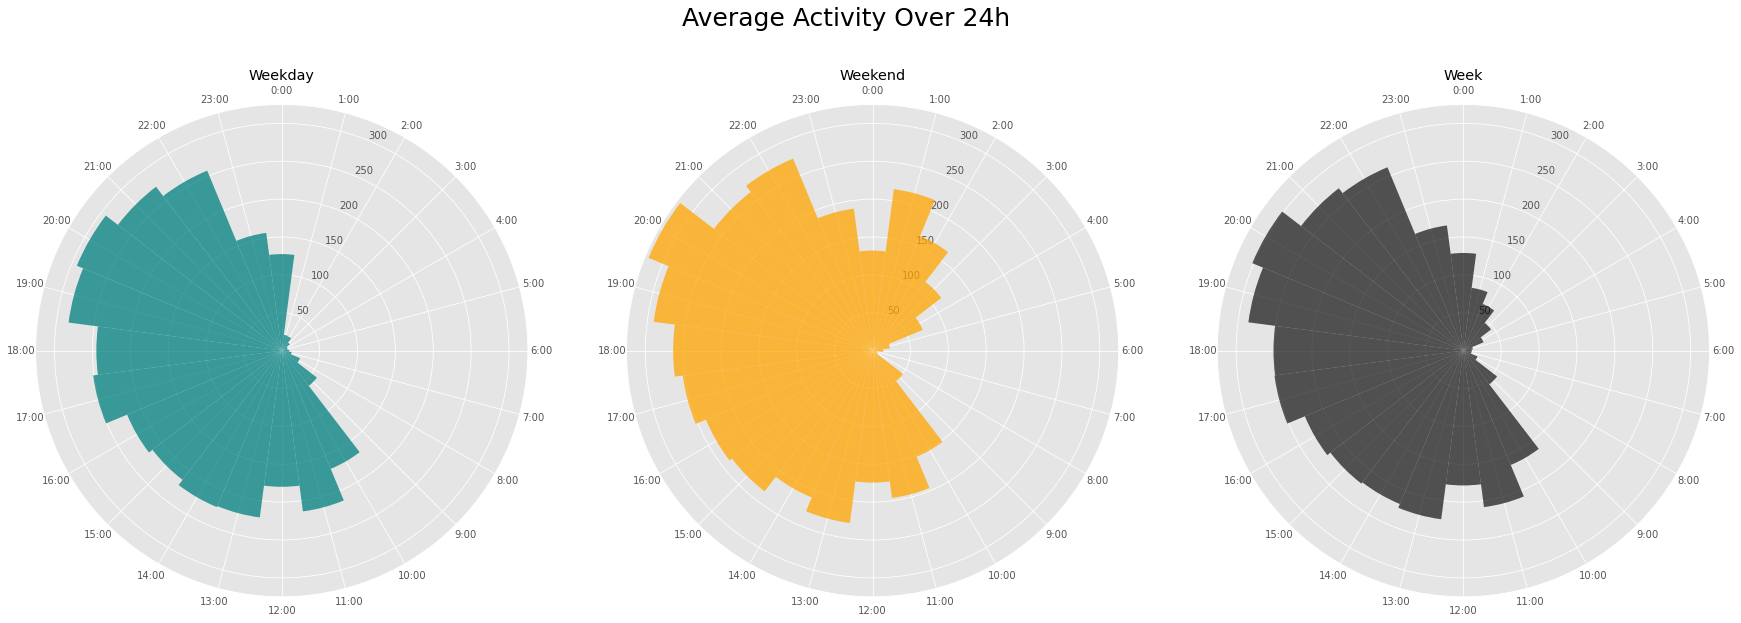

In [21]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Average Activity Over 24h', size = 25)
ax1 = plt.subplot(131, polar=True)
ax2 = plt.subplot(132, polar=True)
ax3 = plt.subplot(133, polar=True)
axs = [ax1, ax2, ax3]

for ax in axs:
    # Set the circumference labels
    ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
    ax.set_xticklabels([f"{i}:00" for i in range(24)])

    # Make the labels go clockwise
    ax.set_theta_direction(-1)       

    # Place 0 at the top
    ax.set_theta_offset(np.pi/2.0)
    
    ax.set_ylim([0,325])

equals = np.deg2rad(np.arange(24) / 24 * 360)+ np.pi/12

ax1.bar(equals, weekday_int.Activity, color = 'teal', width = equals[0], alpha = .75) 
ax1.set_title('Weekday')

ax2.bar(equals, weekend_int.Activity, color = 'orange', width = equals[0], alpha = .75)
ax2.set_title('Weekend')

ax3.bar(equals, mean_int.Activity, color = 'k', width = equals[0], alpha = .65)
ax3.set_title('Week')

plt.savefig('polar_act.png')

### Figure 2
This figure shows the correlation of the log of light intensity and activity. Activity seems to increase as the log of light intensity hits 0, then plateaus after that.

In [13]:
#Sets up light segregated DataFrames in order of light intensity.
white = df.sort_values(by = "White.Light")[['White.Light', 'Activity']]
red = df.sort_values(by = "Red.Light")[['Red.Light', 'Activity']]
green = df.sort_values(by = "Green.Light")[['Green.Light', 'Activity']]
blue = df.sort_values(by = "Blue.Light")[['Blue.Light', 'Activity']]

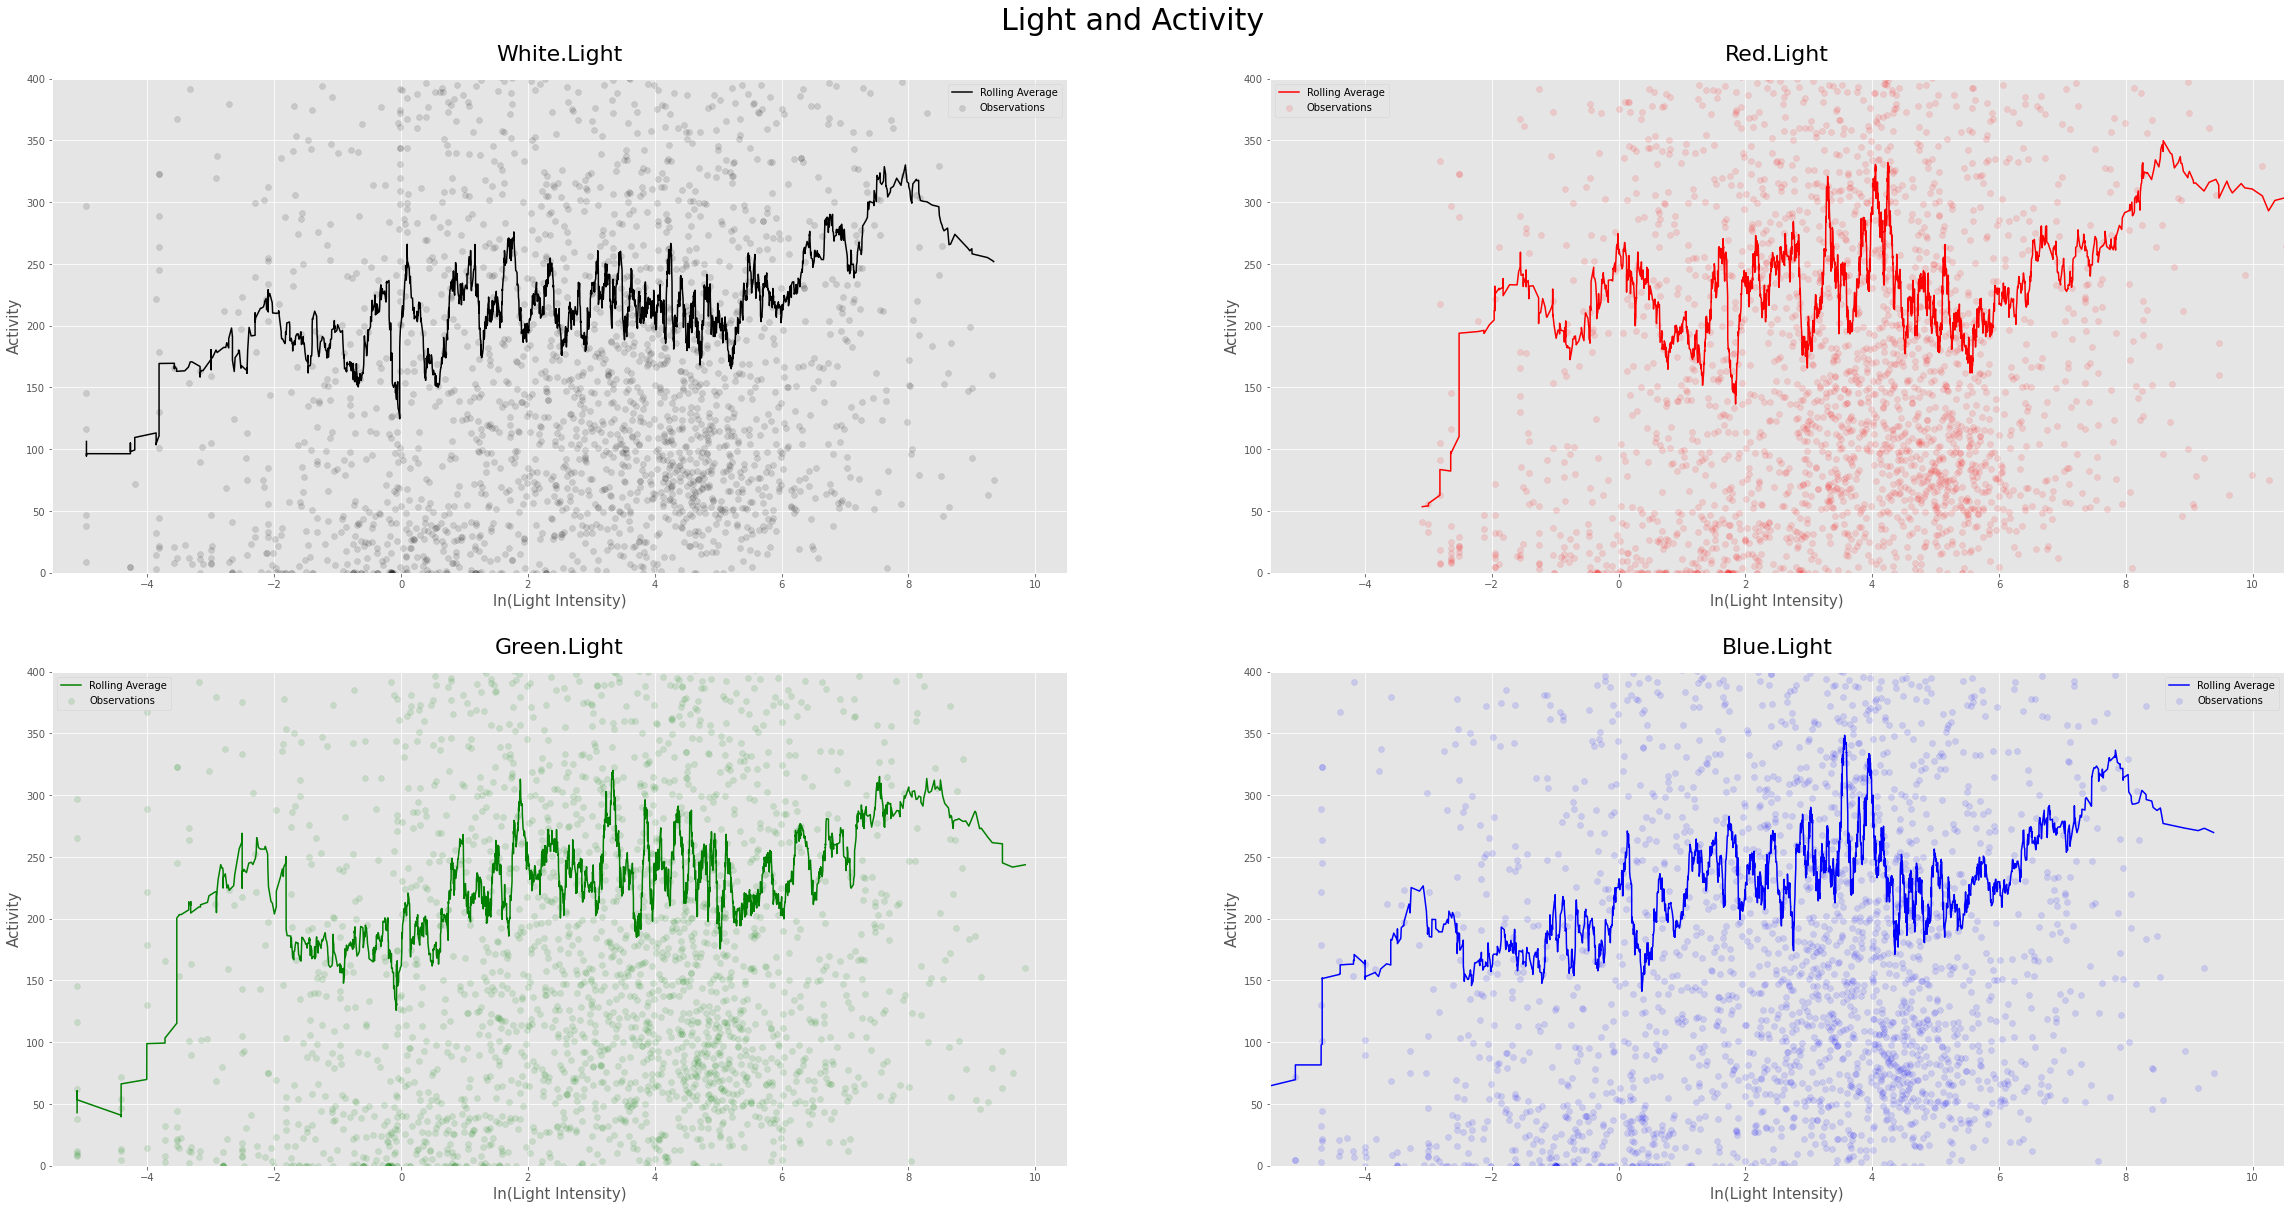

In [28]:
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Light and Activity', size = 30, y = .93)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
axs = [ax1,ax2,ax3,ax4]

ax1.scatter(np.log(white['White.Light']), white['Activity'],
            color = 'black', alpha = .125)
ax1.plot(np.log(white['White.Light']), white.Activity.rolling(50).mean(), color = 'black')
ax1.set_title('White.Light', size = 22, y=1.025)

ax2.scatter(np.log(red['Red.Light']), red['Activity'],
            color = 'r', alpha = .125)
ax2.plot(np.log(red['Red.Light']), red.Activity.rolling(50).mean(), color = 'r')
ax2.set_title('Red.Light', size = 22, y=1.025)

ax3.scatter(np.log(green['Green.Light']), green['Activity'],
            color = 'g', alpha = .125)
ax3.plot(np.log(green['Green.Light']), green.Activity.rolling(50).mean(), color = 'g')
ax3.set_title('Green.Light', size = 22, y=1.025)

ax4.scatter(np.log(blue['Blue.Light']), blue['Activity'],
            color = 'b', alpha = .125)
ax4.plot(np.log(blue['Blue.Light']), blue.Activity.rolling(50).mean(),color = 'b')
ax4.set_title('Blue.Light', size = 22, y=1.025)

for ax in axs:
    ax.set_ylabel('Activity', size = 15)
    ax.set_xlabel("ln(Light Intensity)",size = 15)
    ax.set_xlim([-5.5,10.5])
    ax.set_ylim([0,400])
    ax.legend(['Rolling Average', 'Observations'])

plt.savefig('light_act.png')

### Figure 3
A classic actogram. Black are weekdays, grey are weekends.

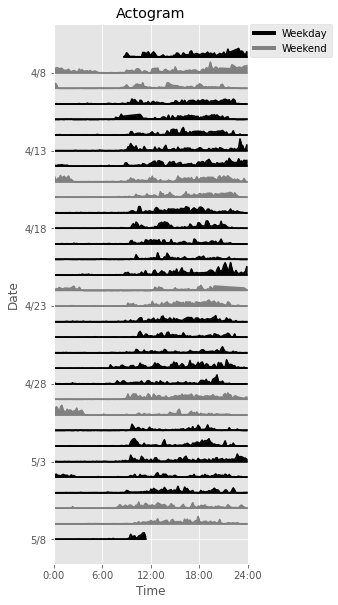

In [155]:
fig = plt.figure(figsize=(9, 10))
ax = fig.add_axes([0.1, 0.1, 0.3, .75])
plt.xlim(0,24)
plt.xticks([0,6,12,18,24],["0:00", "6:00", "12:00","18:00", "24:00"])
plt.yticks([100,105,110,115,120,125,130],["4/8",'4/13',"4/18",'4/23','4/28','5/3','5/8'])
plt.xlabel('Time')
plt.ylabel("Date")
plt.gca().invert_yaxis()
plt.title("Actogram")

legend_elements = [Line2D([0], [0], color='black', lw=4, label='Weekday'),
                  Line2D([0], [0], color='grey', lw=4, label='Weekend')]
plt.legend(handles=legend_elements, loc=(1.01,.938))
          
for day in df.Date.unique():
    w_df = df.loc[df.Date == day].sort_values("Hours")
    if w_df.Dayofweek.max() >= 5:
        color = "grey"
    else:
        color = "black"
    plt.plot(w_df.Hours, w_df.Date - w_df.act_norm/1.25, c=color)
    plt.plot(w_df.Hours, w_df.Date,c= color)
    plt.fill_between(w_df.Hours, w_df.Date, w_df.Date - w_df.act_norm/1.25, color = color)


plt.savefig('actogram.png')

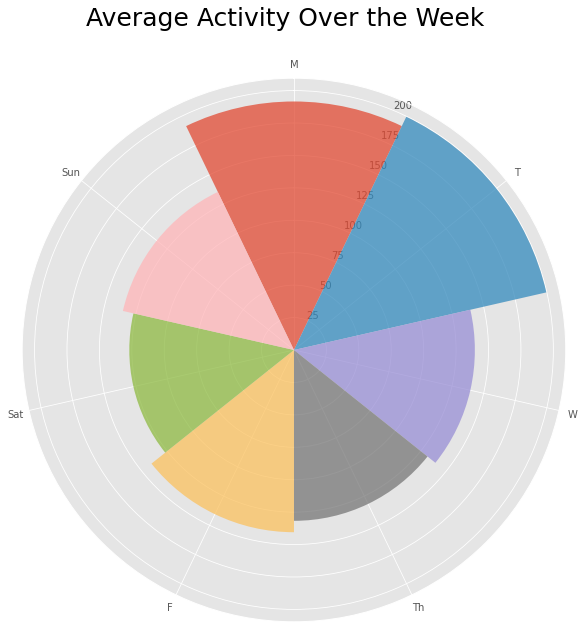

In [88]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Average Activity Over the Week', size = 25)
ax1 = plt.subplot(111, polar=True)

ax1.set_xticks(np.linspace(0, 2*np.pi, 7, endpoint=False))
ax1.set_xticklabels(["M","T","W","Th","F","Sat","Sun"])

# Make the labels go clockwise
ax1.set_theta_direction(-1)       

# Place 0 at the top
ax1.set_theta_offset(np.pi/2.0)

equals = np.deg2rad(np.arange(7) / 7 * 360)

for i in range(7):
    ax1.bar(equals[i], mean_day.Activity[i], width = equals[1], alpha = .75) 
plt.savefig('WeeklyKDE.png')

### Circular Heatmap

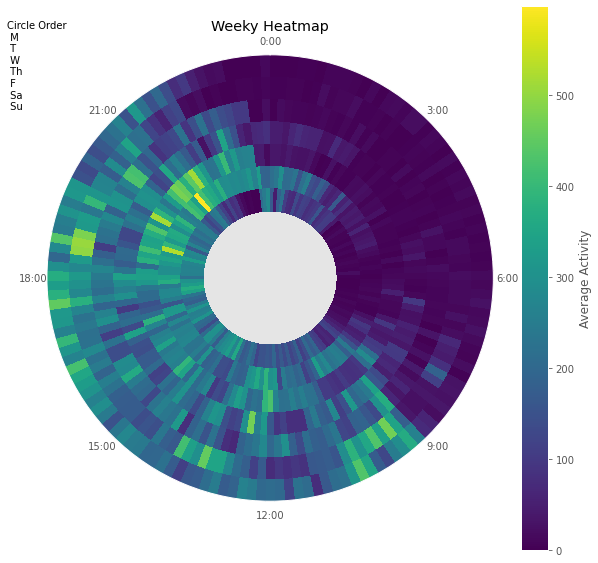

In [161]:
z = pd.pivot_table(df, values = "Activity", index = "Hours", columns = "Dayofweek")
x,y = np.mgrid[0:2*np.pi:144j, 3:10:8j]


fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111, polar = True)

ax1.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax1.set_xticklabels([f"{3*i}:00" for i in range(8)])
ax1.set_yticklabels('')

# Make the labels go clockwise
ax1.set_theta_direction(-1)       

# Place 0 at the top
ax1.set_theta_offset(np.pi/2.0)

cmap = ax1.pcolormesh(x- np.pi/24, 13 - y,z)
fig.colorbar(cmap, label="Average Activity")
plt.title("Weeky Heatmap")
plt.text(-1,14,"Circle Order\n M\n T\n W\n Th\n F\n Sa\n Su")
plt.savefig('WeeklyHeatmap.png')

In [157]:
len(z)

144